$$
Q(X, feature, threshold) = H(X) - \left(\frac{N_{left}}{N} H(X_{left}) + \frac{N_{right}}{N} H(X_{right}) \right)
$$

$$
p_{mk} = \frac{1}{N_m} \sum_{x_i \in X_m} I(y_i=k)
$$

$$
H(X_m) = - \sum_{k=1}^{K} p_{mk}\ log_2 p_{mk}
$$

$$
H(X_m) = \sum_{k=1}^{K} p_{mk}\ (1 - p_{mk}) = 1 - \sum_{k=1}^{K} (p_{mk})^2
$$


$$
\overline{y}_{m} = \frac{1}{N_m} \sum_{i \in N_m} y_i
$$

$$
H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} (y_i - \overline{y}_{m})^2
$$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

In [3]:
# первый класс
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
clf = DecisionTreeClassifier()

In [6]:
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

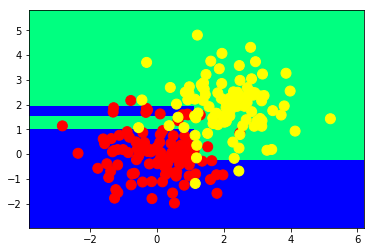

In [7]:
xx, yy = get_grid(train_data)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='winter')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn')

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
iris_df = sns.load_dataset("iris")
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
labels = np.unique(iris_df['species'])

for label in labels:
    idx = iris_df['species'] == label

    print(label)
    iris_sub_df = iris_df[idx]
    print(iris_sub_df.describe())
    print()

setosa
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000  

In [11]:
iris_grouped = iris_df.groupby(by='species')
iris_grouped.describe()

petal_length  petal_width  sepal_length  sepal_width
species                                                               
setosa     count     50.000000    50.000000     50.000000    50.000000
           mean       1.462000     0.246000      5.006000     3.428000
           std        0.173664     0.105386      0.352490     0.379064
           min        1.000000     0.100000      4.300000     2.300000
           25%        1.400000     0.200000      4.800000     3.200000
           50%        1.500000     0.200000      5.000000     3.400000
           75%        1.575000     0.300000      5.200000     3.675000
           max        1.900000     0.600000      5.800000     4.400000
versicolor count     50.000000    50.000000     50.000000    50.000000
           mean       4.260000     1.326000      5.936000     2.770000
           std        0.469911     0.197753      0.516171     0.313798
           min        3.000000     1.000000      4.900000     2.000000
           25%        4.000000     1.200000      5.600000     2.525000
           50%        4.350000     1.300000      5.900000     2.800000
           75%        4.600000     1.500000      6.300000     3.000000
           max        5.100000     1.800000      7.000000     3.400000
virginica  count     50.000000    50.000000     50.000000    50.000000
           mean       5.552000     2.026000      6.588000     2.974000
           std        0.551895     0.274650      0.635880     0.322497
           min        4.500000     1.400000      4.900000     2.200000
           25%        5.100000     1.800000      6.225000     2.800000
           50%        5.550000     2.000000      6.500000     3.000000
           75%        5.875000     2.300000      6.900000     3.175000
           max        6.900000     2.500000      7.900000     3.800000

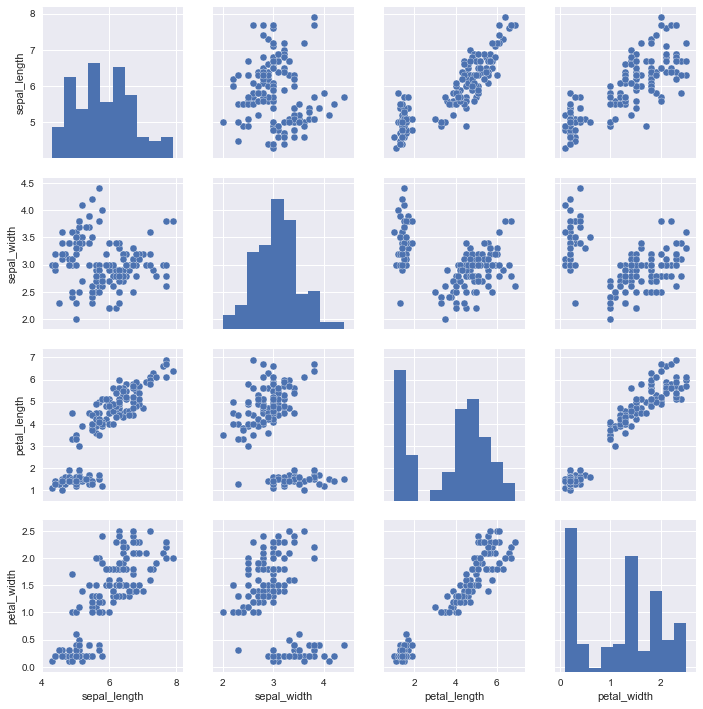

In [12]:
#TODO: apply pairplot to the iris_df
sns.pairplot(iris_df)

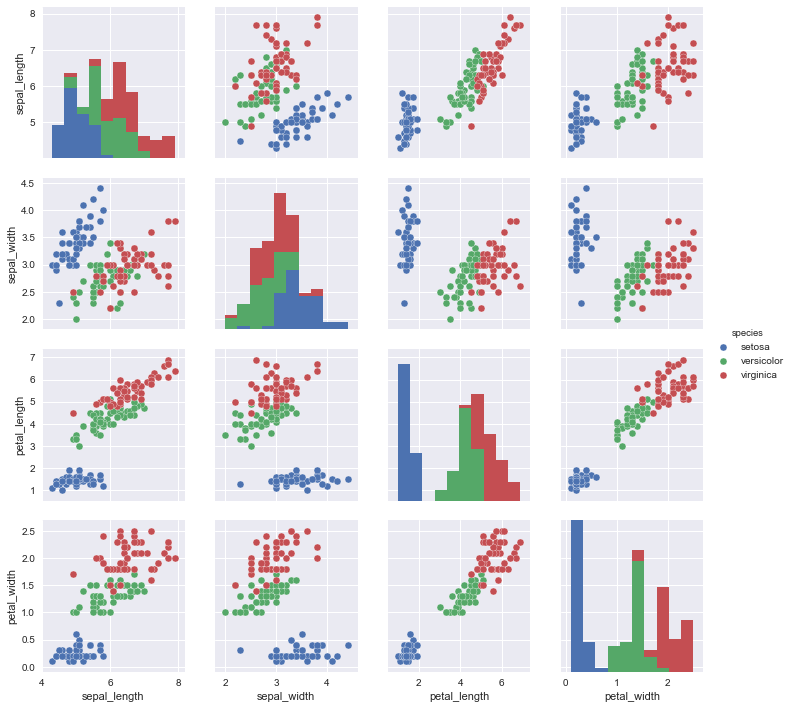

In [13]:
#TODO: modify parameters to use different colors for different classes
sns.pairplot(iris_df, hue='species')

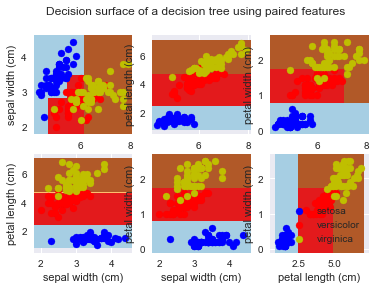

In [14]:
# slightly simplified sklearn example
# see http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3 
plot_colors = "bry"
plot_step = 0.005

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Пример красивой визуализации

![](./iris_2.PNG)

Пример визуализации дерева

https://scikit-learn.org/stable/modules/tree.html#classification

![](https://scikit-learn.org/stable/_images/iris.png)

https://www.kaggle.com/c/forest-cover-type-prediction/data

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('./train.csv')

In [3]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
y = train['Cover_Type']

In [5]:
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7])

In [6]:
X = train.drop(['Id', 'Cover_Type'], axis=1)

In [7]:
from sklearn.metrics import accuracy_score, make_scorer

from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y)
print(scores.mean())

0.67123015873


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
scores = cross_val_score( DecisionTreeClassifier(max_depth=15), X, y, 
                          scoring=make_scorer(accuracy_score, greater_is_better=True) )
print(scores.mean())

0.696362433862


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
scores = cross_val_score(clf, X, y, scoring=make_scorer(accuracy_score, greater_is_better=True) )
print(scores.mean())

0.680224867725


In [14]:
from sklearn.linear_model import LogisticRegression

clf = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(clf, X, y, scoring=make_scorer(accuracy_score, greater_is_better=True) )
print(scores.mean())

0.622685185185


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
scores = cross_val_score( RandomForestClassifier(n_estimators=20), X, y, 
                          scoring=make_scorer(accuracy_score, greater_is_better=True) )
print(scores.mean())

0.764153439153
